In [1]:

import pandas as pd
import datetime
import numpy as np
from pathlib import Path
import sys
import os
import sys
sys.path.append("../../src/")
import micromet


In [3]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [ ]:
root = Path("G:/Shared drives/UGS_Flux/Data_Downloads/")

site_folders = {
    "US-UTD": "Dugout_Ranch",
    "US-UTB": "BSF",
    "US-UTJ": "Bluff",
    "US-UTW": "Wellington",
    "US-UTE": "Escalante",
    "US-UTM": "Matheson",
    "US-UTP": "Phrag",
    "US-CdM": "Cedar_mesa",
    "US-UTV": "Desert_View_Myton",
    "US-UTN": "Juab",
    "US-UTG": "Green_River",
}
data = {}
for stationid, folder in site_folders.items():
    for datatype in ["met", "eddy"]:
        if datatype == "met":
            station_table_str = "Statistics_Ameriflux"
        else:
            station_table_str = "AmeriFluxFormat"
        
        micromet.fix_all_in_parent(root,"21031_Statistics_AmeriFlux*.dat")  # recurse=True if sub-sub-folders exist


✔ All possible files have been checked.


defaultdict(list,
            {'21031_Statistics_AmeriFlux_5.dat': [WindowsPath('G:/Shared drives/UGS_Flux/Data_Downloads/Dugout_Ranch/m20240415/21031_Statistics_AmeriFlux_5.dat'),
              WindowsPath('G:/Shared drives/UGS_Flux/Data_Downloads/Dugout_Ranch/m20240604/21031_Statistics_AmeriFlux_5.dat'),
              WindowsPath('G:/Shared drives/UGS_Flux/Data_Downloads/Dugout_Ranch/Met/21031_Statistics_AmeriFlux_5.dat')],
             '21031_Statistics_AmeriFlux_6.dat': [WindowsPath('G:/Shared drives/UGS_Flux/Data_Downloads/Dugout_Ranch/m20240415/21031_Statistics_AmeriFlux_6.dat'),
              WindowsPath('G:/Shared drives/UGS_Flux/Data_Downloads/Dugout_Ranch/m20240604/21031_Statistics_AmeriFlux_6.dat'),
              WindowsPath('G:/Shared drives/UGS_Flux/Data_Downloads/Dugout_Ranch/Met/21031_Statistics_AmeriFlux_6.dat')],
             '21031_Statistics_AmeriFlux_7.dat': [WindowsPath('G:/Shared drives/UGS_Flux/Data_Downloads/Dugout_Ranch/m20240415/21031_Statistics_AmeriFlux_7.da

In [13]:
root = Path(r"G:\Shared drives\UGS_Flux\Data_Downloads")  # <── your top-level directory here
proc = micromet.AmerifluxDataProcessor(logger=logger)


datatype = "met"  # or "met"

site_folders = {
    #"US-UTD": "Dugout_Ranch",
    #"US-UTB": "BSF",
    #"US-UTJ": "Bluff",
    #"US-UTW": "Wellington",
    #"US-UTE": "Escalante",
    "US-UTM": "Matheson",
    #"US-UTP": "Phrag",
    #"US-CdM": "Cedar_mesa",
    #"US-UTV": "Desert_View_Myton",
    #"US-UTN": "Juab",
    #"US-UTG": "Green_River",
}
data = {}
for stationid, folder in site_folders.items():
    if datatype == "met":
        search_str = f"*Statistics_Ameriflux*.dat"
    else:
        search_str = f"*AmeriFluxFormat_*.dat"
    df = proc.raw_file_compile(stationid, root / folder, search_str)
    df.to_parquet(root / f"{stationid}_{datatype}_{df['file_no'].min()}_{df['file_no'].max()}_data.parquet",)

2025-06-30 13:17:50,186 - INFO - Compiling data from G:\Shared drives\UGS_Flux\Data_Downloads\Matheson
2025-06-30 13:17:50,248 - INFO - Processing file: G:\Shared drives\UGS_Flux\Data_Downloads\Matheson\m20231114\21024_Statistics_AmeriFlux_5.dat


RuntimeError: Header line not recognized: ['NAN', 'NAN', '-0.007947828', '3.134989', '11.58587', '0', '-0.106459', '0', '0.04575901', '0.1483306', '0.2090305', '28.6028', '25.07263', '0', '0', '1.140434', '19.74359', '0', '0.0406289', '3.616979', '11.89953', '0', '0.142124', '7.804804', '9.249237', '0.0546796', '0.2057532', '11.24153', '9.790527', '0.0993573', '0.2223839', '12.24285', '10.35925', '0.2531899', '0.4122892', '26.70557', '11.38085', '0.6236694', '0.5228981', '37.60917', '11.20172', '0.8655991', '0.5415203', '39.02299', '10.69015', '0.8393306', '0.4674377', '31.94908', '10.73443', '1.274525', '0', '0.9568054', '21.19155', '0', '0', '1.786998', '13.32614', '0', '0.1034809', '6.022794', '9.141632', '0', '0.2011652', '10.97281', '9.551696', '0.1807974', '0.2588822', '14.59013', '10.07412', '0.2742372', '0.3823725', '24.0576', '10.40325', '0.5023172', '0.4388724', '29.17446', '10.49136', '0.5903687', '0.4462965', '29.88347', '10.71228', '0.9060248', '0', '0', '0', '0', '2.953411', '188.1799', '255.8741', '25.83333', '0', '0']

In [ ]:
root = Path(r"G:/Shared drives/UGS_Flux/Data_Downloads/Matheson/e20250127/")  # <── your top-level directory here
proc = micromet.AmerifluxDataProcessor(logger=logger)

datatype = "eddy"  # or "met"
data = {}

search_str = f"*AmeriFluxFormat_*.dat"
df = proc.raw_file_compile("US-UTM", root, search_str)
df.to_parquet(root / f"{stationid}_{datatype}_onelines_data.parquet",)

2025-06-30 13:52:17,263 - INFO - Compiling data from G:\Shared drives\UGS_Flux\Data_Downloads\Matheson\e20250127
2025-06-30 13:52:17,310 - INFO - Processing file: G:\Shared drives\UGS_Flux\Data_Downloads\Matheson\e20250127\21022_Flux_AmeriFluxFormat_1003.dat
2025-06-30 13:52:17,341 - INFO - Processing file: G:\Shared drives\UGS_Flux\Data_Downloads\Matheson\e20250127\21022_Flux_AmeriFluxFormat_1005.dat
2025-06-30 13:52:17,362 - INFO - Processing file: G:\Shared drives\UGS_Flux\Data_Downloads\Matheson\e20250127\21022_Flux_AmeriFluxFormat_1004.dat
2025-06-30 13:52:17,382 - INFO - Processing file: G:\Shared drives\UGS_Flux\Data_Downloads\Matheson\e20250127\21022_Flux_AmeriFluxFormat_100.dat
2025-06-30 13:52:17,399 - INFO - Processing file: G:\Shared drives\UGS_Flux\Data_Downloads\Matheson\e20250127\21022_Flux_AmeriFluxFormat_1002.dat
2025-06-30 13:52:17,415 - INFO - Processing file: G:\Shared drives\UGS_Flux\Data_Downloads\Matheson\e20250127\21022_Flux_AmeriFluxFormat_10.dat
2025-06-30 13:

In [ ]:
root = Path(r"C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files") 
micromet.fix_all_in_parent(root,"AmeriFluxFormat_*.dat")  # recurse=True if sub-sub-folders exist
proc = micromet.AmerifluxDataProcessor(logger=logger)

datatype = "eddy"  # or "met"
data = {}

search_str = f"*AmeriFluxFormat_*.dat"
df2 = proc.raw_file_compile("US-UTM", root, search_str)
df2.to_parquet(root / f"{stationid}_{datatype}_.parquet",)



2025-06-30 14:05:28,092 - INFO - Compiling data from C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files
2025-06-30 14:05:28,095 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21022_Flux_AmeriFluxFormat_10 (2).dat
2025-06-30 14:05:28,110 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21022_Flux_AmeriFluxFormat_10.dat
2025-06-30 14:05:28,115 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21022_Flux_AmeriFluxFormat_11.dat
2025-06-30 14:05:28,126 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21022_Flux_AmeriFluxFormat_12.dat
2025-06-30 14:05:28,139 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21022_Flux_AmeriFluxFormat_13.dat
2025-06-30 14:05:28,151 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21022_Flux_AmeriFluxFormat_14.dat
2025-06-30 14:05:28,156 - INFO - 


✔ All possible files have been checked.


2025-06-30 14:05:28,309 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21029_Flux_AmeriFluxFormat_1.dat
2025-06-30 14:05:28,319 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21029_Flux_AmeriFluxFormat_10.dat
2025-06-30 14:05:28,336 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21029_Flux_AmeriFluxFormat_11.dat
2025-06-30 14:05:28,352 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21029_Flux_AmeriFluxFormat_12.dat
2025-06-30 14:05:28,363 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21029_Flux_AmeriFluxFormat_13.dat
2025-06-30 14:05:28,384 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21029_Flux_AmeriFluxFormat_14.dat
2025-06-30 14:05:28,393 - INFO - Processing file: C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Eddy_Files\21029_Flux_AmeriFluxFormat_15.dat
2025-06

In [24]:
eddy_data = pd.concat([df,df2],axis=0)

In [33]:
eddy_data
# Convert numbers to strings, get their lengths, then count occurrences of each length
length_counts = eddy_data['TIMESTAMP_END'].astype(str).str.len().value_counts().sort_index()

print(length_counts)
eddy_data.to_parquet(root / f"{stationid}_{datatype}_alldata.parquet",)

TIMESTAMP_END
12    18420
Name: count, dtype: int64


In [ ]:
df3 = pd.read_csv(r"C:\Users\paulinkenbrandt\Desktop\Flux\Matheson\Matheson Wetlands_Flux_AmeriFluxFormat (2).dat", na_values=['NAN'])

,TIMESTAMP,RECORD,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,...,TS_4_8_1,EC_4_8_1,EC_4_9_1,SWC_4_9_1,K_4_9_1,TS_4_9_1,TS_2_1_1,SWC_2_1_1,TA_1_4_1,Battery_Voltage
0,2022-10-26 15:30:00,1,202210261500,202210261530,414.0292,0.322101,9.419745,0.186403,3.358857,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-26 16:00:00,2,202210261530,202210261600,413.9501,0.296363,9.417489,0.179287,1.980242,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-26 16:30:00,3,202210261600,202210261630,413.5509,0.426511,9.342575,0.105641,1.625808,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-26 17:00:00,4,202210261630,202210261700,412.5099,0.541630,9.403389,0.187825,0.552079,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-26 17:30:00,5,202210261700,202210261730,415.6979,5.603356,9.722460,0.094429,2.767656,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21499,2024-08-10 18:30:00,4138,202408101800,202408101830,411.7223,0.517100,17.055970,0.480114,3.802385,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.16303,-87.27771,NaN
21500,2024-08-10 19:00:00,4139,202408101830,202408101900,411.0712,0.558225,18.269070,0.454573,3.993999,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.14604,-87.28137,NaN
21501,2024-08-10 19:30:00,4140,202408101900,202408101930,416.0096,14.459760,18.162030,1.160824,2.486727,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.13653,-87.28614,NaN
21502,2024-08-10 20:00:00,4141,202408101930,202408102000,416.0174,8.496524,17.885380,0.948971,0.330693,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.07344,-87.28927,NaN


In [36]:
eddy_data = eddy_data.sort_values(['TIMESTAMP_START'])


import plotly.graph_objects as go

# ----- assume `hourly` already exists from the resample/agg step -----
# If not, run the block from the previous answer first.

fig = go.Figure()

# 1) add the “central-tendency” curves
fig.add_scatter(
    x=pd.to_datetime(eddy_data['TIMESTAMP_START'],format="%Y%m%d%H%M"), y=eddy_data['CO2'],
    mode="lines", name="mean"
)

In [12]:
root = Path(r"G:\Shared drives\UGS_Flux\Data_Downloads")  # <── your top-level directory here
for file in root.glob("*.parquet"):
    print(file)

G:\Shared drives\UGS_Flux\Data_Downloads\US-UTD_eddy_0_23_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTB_eddy_0_45_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTJ_eddy_1_20_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTW_eddy_0_50_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTE_eddy_0_12_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTP_eddy_0_9999_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-CdM_eddy_0_19_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTV_eddy_0_29_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTG_eddy_0_7_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTD_met_5_9999_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTJ_met_0_9999_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTE_met_0_9999_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-UTP_met_0_9999_data.parquet
G:\Shared drives\UGS_Flux\Data_Downloads\US-CdM_met_0_9999_data.parquet


In [ ]:
pd.read_parquet(r"G:\Shared drives\UGS_Flux\Data_Downloads\US-UTM_eddy_0_23_data.parquet")

,TIMESTAMP_START,TIMESTAMP_END,ALB,NETRAD,SW_IN,SW_OUT,LW_IN,LW_OUT,T_CANOPY,T_SI111_body,...,LWmV_1_1_1,LWMDry_1_1_1,LWMCon_1_1_1,LWMWet_1_1_1,LWmV_1_1_2,LWMDry_1_1_2,LWMCon_1_1_2,LWMWet_1_1_2,file_no,datalogger_no
0,202310260830,202310260900,24.16074,-10.711610,79.326940,20.174640,293.1630,363.0269,7.861156,11.391150,...,262.5575,100.0,0.0,0.0,262.5203,100.0,0.0,0.0,5,21031
1,202310260900,202310260930,24.84335,159.641800,314.583200,81.059340,311.3093,385.1913,12.585570,14.378940,...,261.1911,100.0,0.0,0.0,261.1948,100.0,0.0,0.0,5,21031
2,202310260930,202310261000,23.70288,NaN,NaN,NaN,NaN,NaN,12.578060,15.966210,...,261.5587,100.0,0.0,0.0,261.3105,100.0,0.0,0.0,5,21031
3,202310261000,202310261030,22.87897,9.198333,126.035300,29.085550,289.3351,377.0864,10.987410,14.562030,...,262.0614,100.0,0.0,0.0,261.7790,100.0,0.0,0.0,5,21031
4,202310261030,202310261100,22.09374,38.510250,159.753600,37.294300,295.2404,379.1895,11.316540,14.450050,...,262.0297,100.0,0.0,0.0,261.6741,100.0,0.0,0.0,5,21031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68088,202412272100,202412272130,0.00000,-42.763110,-0.521222,-0.115194,271.9177,314.2747,-1.527029,1.712341,...,268.7204,100.0,0.0,0.0,268.0498,100.0,0.0,0.0,9999,9999
68089,202412272130,202412272200,0.00000,-68.832440,-0.732000,-0.022500,237.7209,305.8438,-3.865474,1.041148,...,269.1631,100.0,0.0,0.0,268.1617,100.0,0.0,0.0,9999,9999
68090,202412272200,202412272230,0.00000,-66.212910,-0.762417,-0.090222,235.0934,300.6341,-5.049711,-0.354648,...,269.7886,100.0,0.0,0.0,267.5774,100.0,0.0,0.0,9999,9999
68091,202412272230,202412272300,0.00000,-62.420000,-0.678139,-0.089917,238.9159,300.7477,-4.880823,-0.904645,...,269.9974,100.0,0.0,0.0,271.4360,100.0,0.0,0.0,9999,9999


In [7]:
df = pd.read_parquet(root / "US-UTD_met_5_9999_data.parquet")

am_data = micromet.Reformatter(drop_soil=False,
                                logger=logger,
                                )
#raw_data = raw_data.drop([0], axis=0)
am_df = am_data.prepare(df)
am_df['datalogger_no'] = 21031
am_df

2025-06-30 12:30:14,685 - INFO - Starting reformat (68093 rows)
2025-06-30 12:30:15,686 - INFO - Done; final shape: (34552, 59)


,TIMESTAMP_START,TIMESTAMP_END,ALB,NETRAD,SW_IN,SW_OUT,LW_IN,LW_OUT,T_CANOPY,T_SI111_body,...,LWmV_1_1_1,LWMDry_1_1_1,LWMCon_1_1_1,LWMWet_1_1_1,LWmV_1_1_2,LWMDry_1_1_2,LWMCon_1_1_2,LWMWet_1_1_2,file_no,datalogger_no
datetime_start,,,,,,,,,,,,,,,,,,,,,
2023-05-24 15:30:00,202305241530,202305241600,-9999.00000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.00000,-78.72036,...,-1315.1310,43.88889,0.0,0.0,-1816.1490,43.88889,0.0,0.0,9999.0,21031
2023-05-24 16:00:00,202305241600,202305241630,-9999.00000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.00000,-78.50776,...,-110.6724,100.00000,0.0,0.0,-222.0543,100.00000,0.0,0.0,9999.0,21031
2023-05-24 16:30:00,202305241630,202305241700,-9999.00000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.00000,-78.49310,...,256.0321,100.00000,0.0,0.0,257.6569,100.00000,0.0,0.0,9999.0,21031
2023-05-24 17:00:00,202305241700,202305241730,7.80607,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.00000,18.83090,...,255.9044,100.00000,0.0,0.0,257.9362,100.00000,0.0,0.0,9999.0,21031
2023-05-24 17:30:00,202305241730,202305241800,24.82800,252.0812,500.1144,124.7287,314.2957,437.6002,23.80682,26.97647,...,254.9888,100.00000,0.0,0.0,257.9271,100.00000,0.0,0.0,9999.0,21031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-13 09:00:00,202505130900,202505130930,23.49375,446.7189,761.8327,178.9415,289.9461,426.1184,19.63299,21.44107,...,258.6791,100.00000,0.0,0.0,258.3070,100.00000,0.0,0.0,9999.0,21031
2025-05-13 09:30:00,202505130930,202505131000,22.89209,509.1336,835.5638,191.2458,294.1239,429.3082,20.33200,21.40081,...,258.6787,100.00000,0.0,0.0,258.4439,100.00000,0.0,0.0,9999.0,21031
2025-05-13 10:00:00,202505131000,202505131030,22.35525,563.4611,901.9198,201.5875,297.2929,434.1642,21.22629,21.79152,...,258.4643,100.00000,0.0,0.0,258.7210,100.00000,0.0,0.0,9999.0,21031


<Axes: xlabel='datetime_start'>

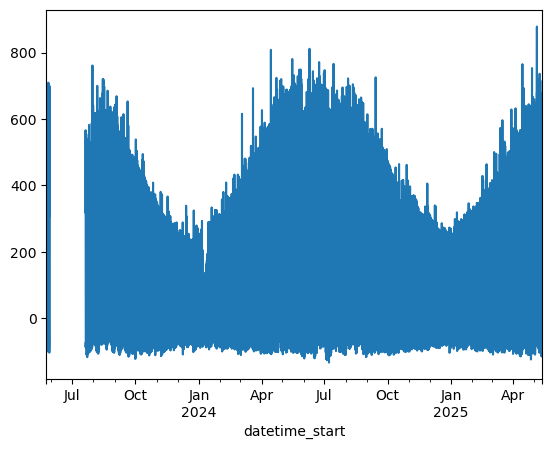

In [8]:
am_df['NETRAD'].replace(-9999,np.nan).plot()

In [ ]:
# Process data for all stations
site_folders = {#'US-UTD':'Dugout_Ranch',
                'US-UTB':'BSF',
                'US-UTJ':'Bluff',
                'US-UTW':'Wellington',
                'US-UTE':'Escalante',
                'US-UTM':'Matheson',
                'US-UTP':'Phrag',
                'US-CdM':'Cedar_Mesa',
                'US-UTV':'Desert_View_Myton',
                'US-UTL':'Pelican_Lake',
                'US-UTG':'Green_River',
                }


loggertype = 'eddy'
station = 'US-UTE'
station_id = manager.get_station_id(station)
manager = micromet.StationDataProcessor(config=config, 
                                        engine=engine)
last_date = manager.get_max_date(station)
raw_data, pack_size, status_code = manager.download_from_station(station,
                                                                 loggertype=loggertype,
                                                                 p1=f"{pd.to_datetime(last_date, format="%Y%m%d%H%M"):%Y-%m-%d %H:%M}",
                                                                )

manager.process_station_data(site_folders,
                             config_path = "../../src/micromet/data/reformatter_vars.yml",
                             var_limits_csv = "../../src/micromet/data/extreme_values.csv",       
                             )